This is a PySR run on the molecular mass dataset with the division operator removed and the logarithm and exponential operators added.

In [31]:
# Install libraries
%pip install -U pysr


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: /home/richard/Documents/p311a/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
# Call Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from google.colab import drive
from pysr import PySRRegressor
import time
#import math
import sympy as sym

In [33]:
# Colab
#drive.mount('/content/drive')
#df=pd.read_csv('/content/drive/MyDrive/goossens_raw.csv')
# Positron
df=pd.read_csv('./goossens_raw.csv')
#df=pd.read_csv('./c694/goossens_raw.csv')

y=df['MW']
x=df[['SG','TBP']]

In [34]:
t0 = time.time()
# Add Log and Exp Functions
myMod=PySRRegressor(
    random_state=7,
    deterministic=True,
    parallelism='serial',
    binary_operators=["+","-","*"],
    unary_operators=["exp","log"])
myMod.fit(x,y)
y_pred=myMod.predict(x)
print("time to fit: ",time.time() - t0, 'seconds')

/home/richard/Documents/p311a/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 7.860e+04
Progress: 415 / 3100 total iterations (13.387%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.627e+04  0.000e+00  y = 304.55
3           2.941e+04  5.897e-01  y = TBP - 270.61
5           1.858e+04  2.281e-01  y = (TBP * 0.00093598) * TBP
7           7.214e+03  4.724e-01  y = (TBP * (TBP * 1.1819e-06)) * TBP
9           7.203e+03  5.067e-04  y = (TBP * ((TBP - SG) * 1.1831e-06)) * TBP
10          7.186e+03  1.936e-03  y = TBP * ((1.1819e-06 * (TBP - exp(SG))) * TBP)
13          3.490e+03  2.406e-01  y = ((((TBP - 157.96) * 0.0032288) - SG) * (TBP + -369.4))...
                                       - -97.047
17          3.241e+03  1.844e-02  y = (((TBP + -361.8) * (((TBP - 1593.9) * SG) + (TBP - -52...
                               

[ Info: Final population:
[ Info: Results saved to:


time to fit:  39.88021206855774 seconds
  - outputs/20250722_075051_frzCpD/hall_of_fame.csv


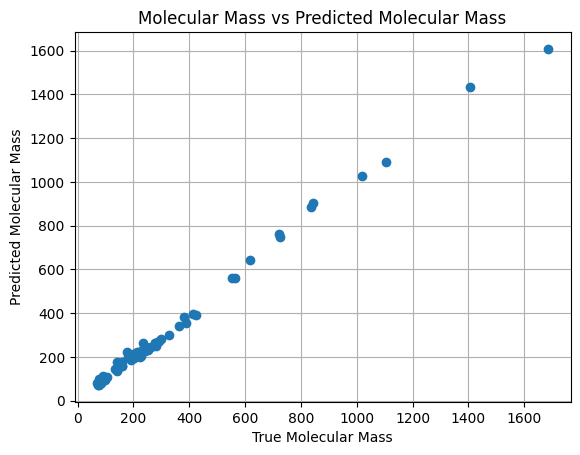

In [35]:
plt.plot(y,y_pred,marker="o",linestyle="None")
plt.xlabel('True Molecular Mass')
plt.ylabel('Predicted Molecular Mass')
plt.title('Molecular Mass vs Predicted Molecular Mass')
plt.grid()
plt.show()

In [36]:
# Pull Out Equation
myEq=myMod.sympy()
# Clean-Up Equation
sym.simplify(myEq)

-TBP*(0.0008679909*TBP - 0.22470881)*(3.7613497e-6*(1469.0803*SG - 2*TBP)*(TBP - 553.8877) - 1) + 56.166397

In [37]:
# Add Prediction to Dataframe
df['Fit_Mw_7']=y_pred
# Calculate Correlation Coefficient between columns
df.corr()

,SG,TBP,MW,Fit_Mw_7
SG,1.000000,0.625218,0.334852,0.348819
TBP,0.625218,1.000000,0.869591,0.869577
MW,0.334852,0.869591,1.000000,0.997705
Fit_Mw_7,0.348819,0.869577,0.997705,1.000000


In [38]:
print(myMod)

PySRRegressor.equations_ = [
	    pick     score                                           equation         loss  complexity
	0         0.000000                                           304.5473  96270.34000           1
	1         0.592876                                    TBP - 270.61478  29412.14600           3
	2         0.229607                        (TBP * 0.00093600526) * TBP  18582.01000           5
	3         0.113724                      TBP * (log(TBP) + -5.8921685)  16584.52500           6
	4         0.854809                  ((TBP * 0.0021440638) - SG) * TBP   7054.46530           7
	5         0.394902       TBP * (exp(TBP * 0.0031990034) * 0.05582458)   4752.91700           8
	6         0.724920  (TBP * exp((TBP * 0.003266118) - SG)) * 0.1275...   1115.07040          10
	7         0.030790  ((0.09876312 * exp((TBP * 0.0035564199) - SG))...   1048.47670          12
	8         0.027450  exp(exp(1.0480287)) + (exp((TBP * 0.0035564199...    992.46650          14
	9         

In [39]:
t0 = time.time()
# Re-Run with new random seed
myMod=PySRRegressor(
    random_state=11,
    deterministic=True,
    parallelism='serial',
    binary_operators=["+","-","*"],
    unary_operators=["exp","log"])
myMod.fit(x,y)
y_pred=myMod.predict(x)
print("time to fit: ",time.time() - t0, 'seconds')

/home/richard/Documents/p311a/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 8.400e+04
Progress: 419 / 3100 total iterations (13.516%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.627e+04  0.000e+00  y = 304.55
3           2.941e+04  5.897e-01  y = TBP + -270.61
5           2.347e+04  1.116e-01  y = (TBP * 1.3999) - 500.62
6           1.970e+04  1.730e-01  y = exp((TBP - -72.18) * 0.0069749)
10          8.478e+03  2.102e-01  y = ((TBP * 5.121) + 10883) - (log(TBP) * 2146)
12          8.406e+03  3.791e-03  y = (2314 - (log(TBP) * 2148.5)) + ((TBP * 5.1228) + 8575....
                                      7)
13          8.300e+03  1.174e-02  y = (((TBP - exp(SG)) * 5.121) - (log(TBP) * 2146)) + 1088...
                                      4
15          7.769e+03  3.280e-02  y = (((TBP - exp(SG + SG)) * 5.1449) + 10889)

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.627e+04  0.000e+00  y = 304.55
3           2.941e+04  5.897e-01  y = TBP + -270.61
4           1.892e+04  4.383e-01  y = exp(TBP * 0.0073489)
6           4.733e+03  6.917e-01  y = exp(TBP * 0.0071684) + 132.96
8           8.118e+02  8.814e-01  y = exp((TBP * 0.0044266) - (SG + -3.6784))
10          7.867e+02  1.564e-02  y = exp(((TBP + 2.063) * 0.0044266) - (SG + -3.6784))
12          7.412e+02  2.976e-02  y = exp((TBP * 0.0066937) + (1.3376 - SG)) + (TBP * 0.2196...
                                      7)
14          5.449e+02  1.538e-01  y = exp((TBP * 0.0059487) + (1.4122 - (SG + -0.66264))) + ...
                                      (TBP * 0.1794)
16          3.154e+02  2.733e-01  y = (TBP * 0.1794) + exp((TBP * 0.0059487) + (1.4122 - (SG...
                                       * (SG + -0.66264))))
18          2.629e+02  9.

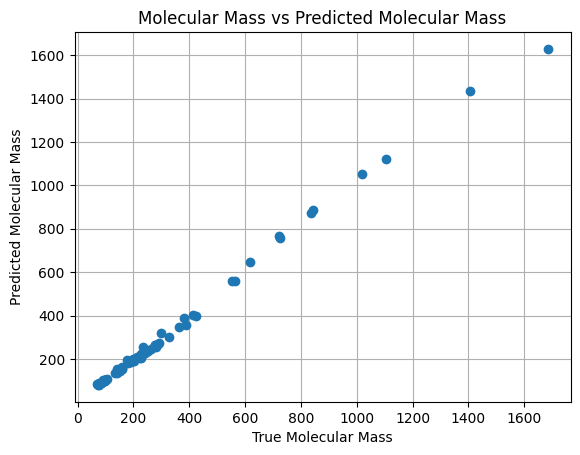

In [40]:
# Replot with new predictions
plt.plot(y,y_pred,marker="o",linestyle="None")
plt.xlabel('True Molecular Mass')
plt.ylabel('Predicted Molecular Mass')
plt.title('Molecular Mass vs Predicted Molecular Mass')
plt.grid()
plt.show()

In [41]:
# Pull Out New Equation
myEq=myMod.sympy()
# Clean-Up Equation
sym.simplify(myEq)

0.17939937*TBP + 4.10489432673765*exp(-SG**2 + 0.6626415*SG + 0.0059487335*TBP)

In [42]:
# Add New Prediction to Dataframe
df['Fit_Mw_11']=y_pred
# Calculate Correlation Coefficient between columns
df.corr()

,SG,TBP,MW,Fit_Mw_7,Fit_Mw_11
SG,1.000000,0.625218,0.334852,0.348819,0.344733
TBP,0.625218,1.000000,0.869591,0.869577,0.867574
MW,0.334852,0.869591,1.000000,0.997705,0.998420
Fit_Mw_7,0.348819,0.869577,0.997705,1.000000,0.999497
Fit_Mw_11,0.344733,0.867574,0.998420,0.999497,1.000000


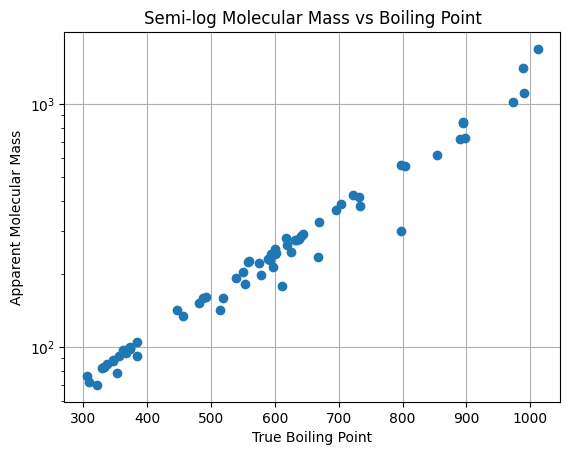

In [43]:
plt.plot(df["TBP"],df["MW"],marker="o",linestyle="None")
plt.xlabel('True Boiling Point')
plt.ylabel('Apparent Molecular Mass')
plt.title('Semi-log Molecular Mass vs Boiling Point')
plt.yscale('log')
plt.grid()
plt.show()